# Find the top 100 words that appear in the text of _The Republic_

In [1]:
import collections
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
with open('E:/2024计算社会科学夏校/data/The Republic.txt', 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
len(lines)

16949

In [3]:
lines[:50]

['The Project Gutenberg eBook of The Republic\n',
 '    \n',
 'This ebook is for the use of anyone anywhere in the United States and\n',
 'most other parts of the world at no cost and with almost no restrictions\n',
 'whatsoever. You may copy it, give it away or re-use it under the terms\n',
 'of the Project Gutenberg License included with this ebook or online\n',
 'at www.gutenberg.org. If you are not located in the United States,\n',
 'you will have to check the laws of the country where you are located\n',
 'before using this eBook.\n',
 '\n',
 'Title: The Republic\n',
 '\n',
 'Author: Plato\n',
 '\n',
 'Translator: Benjamin Jowett\n',
 '\n',
 'Release date: July 1, 1994 [eBook #150]\n',
 '                Most recently updated: January 1, 2021\n',
 '\n',
 'Language: English\n',
 '\n',
 '\n',
 '\n',
 '*** START OF THE PROJECT GUTENBERG EBOOK THE REPUBLIC ***\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '**********************************************************************\n',
 "THIS EBOOK WAS O

In [4]:
# Remove information such as title, author, date of publication, etc. that has nothing to do with the content of the text.
lines = [i for i in lines[46:] if i !='\n']  

In [5]:
len(lines)

12421

In [6]:
lines[:50]

['(360 B.C.)\n',
 'translated by Benjamin Jowett\n',
 'THE INTRODUCTION\n',
 'THE Republic of Plato is the longest of his works with the exception of\n',
 'the Laws, and is certainly the greatest of them.  There are nearer\n',
 'approaches to modern metaphysics in the Philebus and in the Sophist;\n',
 'the Politicus or Statesman is more ideal; the form and institutions of\n',
 'the State are more clearly drawn out in the Laws; as works of art, the\n',
 'Symposium and the Protagoras are of higher excellence.  But no other\n',
 'Dialogue of Plato has the same largeness of view and the same\n',
 'perfection of style; no other shows an equal knowledge of the world, or\n',
 'contains more of those thoughts which are new as well as old, and not\n',
 'of one age only but of all.  Nowhere in Plato is there a deeper irony\n',
 'or a greater wealth of humor or imagery, or more dramatic power.  Nor\n',
 'in any other of his writings is the attempt made to interweave life and\n',
 'speculation, or

In [7]:
# Merge each string in the list with spaces to form a single string
lines = ' '.join(lines)

In [8]:
lines[:500]

'(360 B.C.)\n translated by Benjamin Jowett\n THE INTRODUCTION\n THE Republic of Plato is the longest of his works with the exception of\n the Laws, and is certainly the greatest of them.  There are nearer\n approaches to modern metaphysics in the Philebus and in the Sophist;\n the Politicus or Statesman is more ideal; the form and institutions of\n the State are more clearly drawn out in the Laws; as works of art, the\n Symposium and the Protagoras are of higher excellence.  But no other\n Dialogue of Pl'

In [9]:
# Clean up the original text, removing unnecessary punctuation and special characters
lines = lines.replace('\n', '').replace('.', '').replace(',', '')
lines = lines.replace(';', '').replace('-', ' ').replace("\'"," ")
lines = lines.replace('"', '').replace('(', ' ').replace(')', ' ')

In [10]:
words = lines.split(' ') # Separate words by space
words = [i.lower() for i in words if i != '']
len(words)

128092

In [11]:
# from collections import Counter 
top100 = collections.Counter(words).most_common(100)

In [12]:
top100

[('the', 7876),
 ('and', 6045),
 ('of', 5193),
 ('to', 3534),
 ('is', 2697),
 ('in', 2385),
 ('a', 2172),
 ('he', 2159),
 ('that', 1992),
 ('be', 1881),
 ('i', 1589),
 ('not', 1507),
 ('which', 1421),
 ('are', 1353),
 ('or', 1290),
 ('you', 1236),
 ('they', 1174),
 ('will', 1143),
 ('said', 1027),
 ('as', 979),
 ('we', 926),
 ('but', 886),
 ('have', 875),
 ('them', 768),
 ('his', 759),
 ('for', 727),
 ('by', 719),
 ('who', 673),
 ('their', 638),
 ('with', 634),
 ('this', 633),
 ('what', 626),
 ('then', 586),
 ('if', 580),
 ('one', 578),
 ('all', 549),
 ('there', 535),
 ('at', 528),
 ('has', 492),
 ('when', 488),
 ('true', 483),
 ('other', 480),
 ('any', 477),
 ('do', 475),
 ('yes', 448),
 ('no', 441),
 ('may', 434),
 ('him', 424),
 ('would', 422),
 ('good', 414),
 ('from', 399),
 ('state', 383),
 ('man', 363),
 ('only', 346),
 ('our', 344),
 ('an', 343),
 ('was', 335),
 ('say', 324),
 ('more', 322),
 ('must', 308),
 ('on', 307),
 ('should', 298),
 ('can', 293),
 ('us', 285),
 ('so', 28

In [13]:
# Write the counted word frequencies to the hard disk
with open('pg150-top100.txt', 'w') as f:
    for i, j in top100: 
        f.write(i + ','+str(j)+'\n')

In [14]:
df = pd.read_csv('pg150-top100.txt',names=['words', 'freq'])
df[:10]

,words,freq
0,the,7876
1,and,6045
2,of,5193
3,to,3534
4,is,2697
5,in,2385
6,a,2172
7,he,2159
8,that,1992
9,be,1881


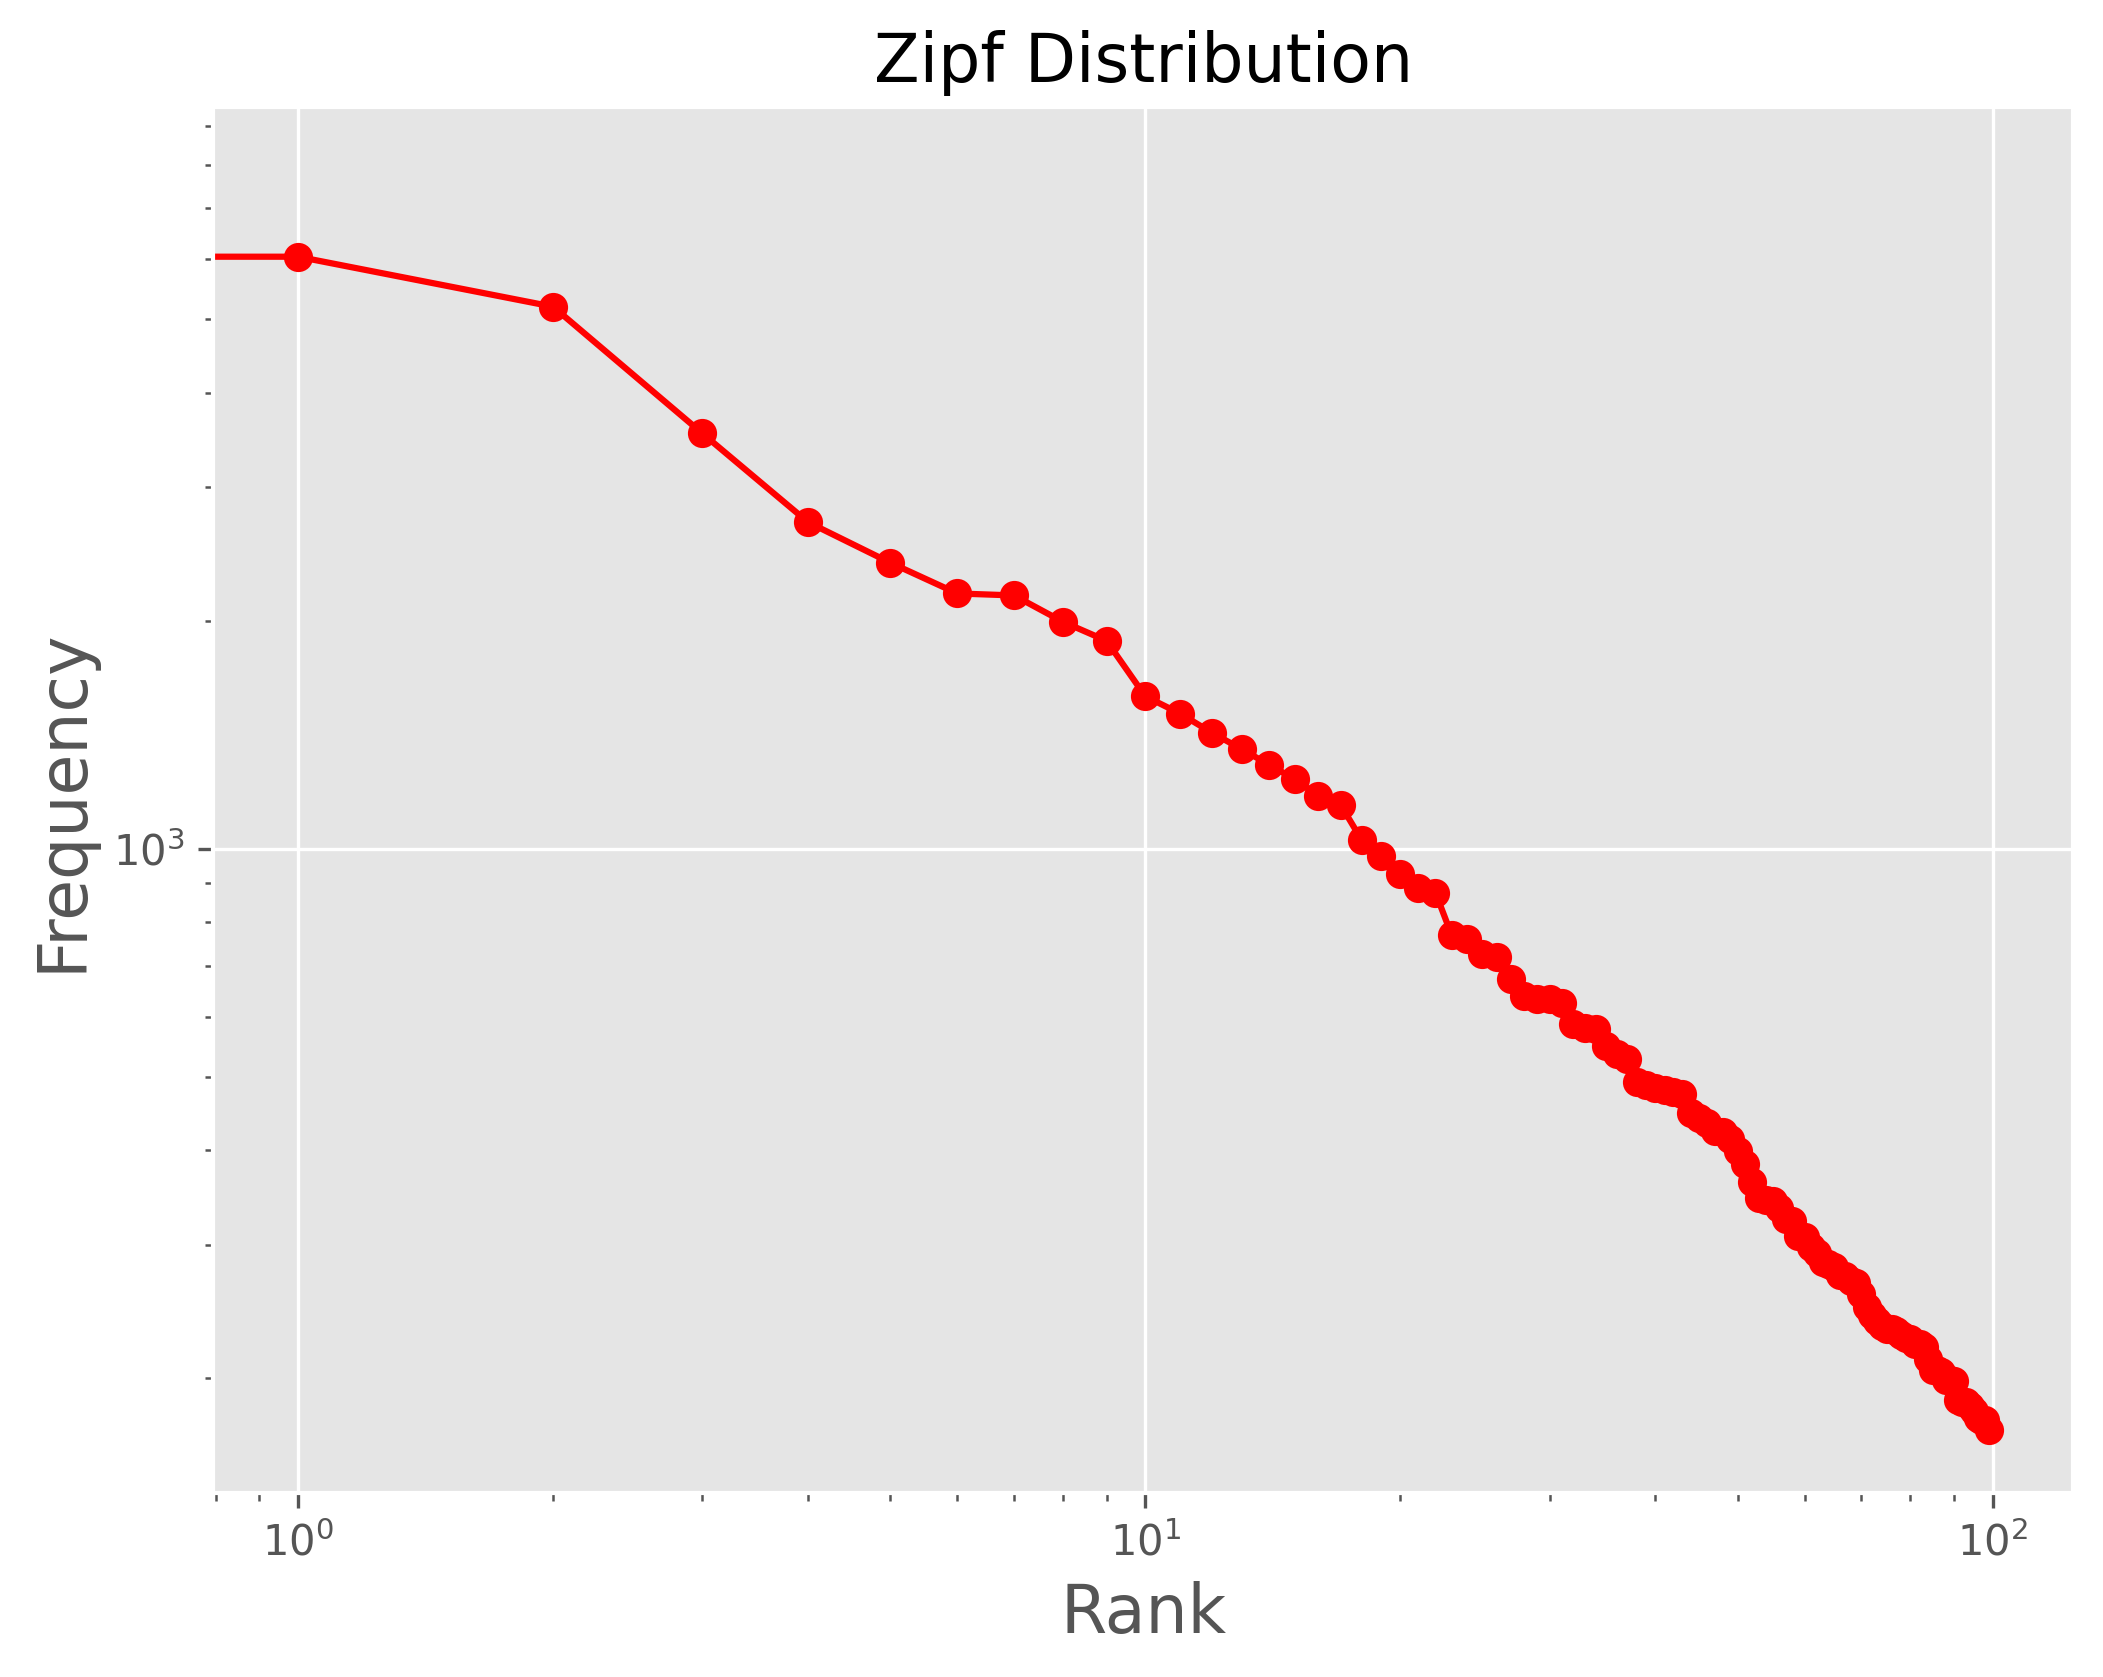

In [15]:
plt.style.use('ggplot')
plt.figure(figsize = (8,6), dpi = 300)
plt.plot(df.index, df['freq'].tolist(), 'r-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Zipf Distribution', fontsize = 16)
plt.show()

From the graph, we can see that
- The vast majority of words occur less than 1,000 times
- As rank increases, word frequency decreases and the rate of decrease slows down